In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, kendalltau, spearmanr

#4.10 - ¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?

In [3]:
df = pd.read_csv("movies.csv", encoding="latin1")
df_best_reviews = df.sort_values(by="voteAvg", ascending=False).head(20)
directors = df_best_reviews[~df['director'].isnull()]['director']
print(directors)

9298                         Laurent Bouzereau
9733                            Christin Baker
9246                             Rebecca Sugar
9990                       Miguel Angel Zavala
8632                              Thomas Coven
9347                              Kaku Arakawa
9084                Víctor Barba|Juan Olivares
6885    Dave Bullock|Troy Adomitis|Victor Cook
9368                            Won Myeong-jun
6170                              Samuel Leong
5528                        Selena Quintanilla
9756                            Haruo Sotozaki
9783                            Haruo Sotozaki
9451                              Park Jun-soo
8265                           Ulises Valencia
9777                              Igor Kopylov
Name: director, dtype: object


C:\Users\Alien Ware\AppData\Local\Temp\ipykernel_22112\3031355630.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  directors = df_best_reviews[~df['director'].isnull()]['director']


#4.11 - ¿Cómo se correlacionan los presupuestos con los ingresos? ¿Los altos presupuestos significan altos ingresos? Haga los gráficos que necesite, histograma, diagrama de dispersión


In [52]:
col1, col2 = 'budget', 'revenue'
corr = df[col1].corr(df[col2])
print ("El coeficiente de correlación entre ", col1, " y ", col2, "es: ", round(corr, 2))

El coeficiente de correlación entre  budget  y  revenue es:  0.76


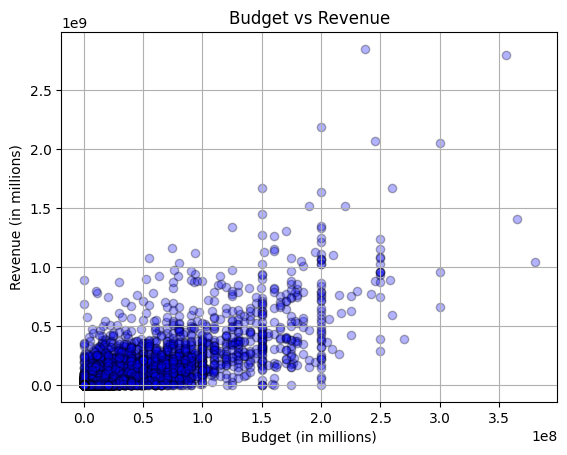

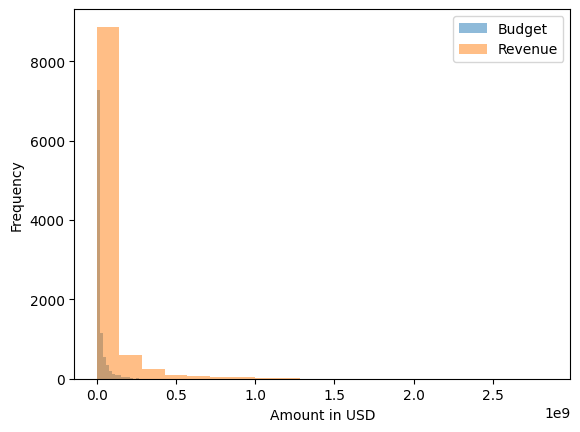

In [5]:
plt.scatter(df["budget"], df["revenue"], c="blue", edgecolor="black", alpha=0.3)
plt.xlabel("Budget (in millions)")
plt.ylabel("Revenue (in millions)")
plt.title("Budget vs Revenue")
plt.grid(True)
plt.show()

#histograma
plt.hist(df['budget'], bins=20, alpha=0.5, label='Budget')
plt.hist(df['revenue'], bins=20, alpha=0.5, label='Revenue')
plt.legend()
plt.xlabel('Amount in USD')
plt.ylabel('Frequency')
plt.show()

Si se hace un test de correlación pearson, se puede ver que tiene un coeficiente de 0.76 el cual es cercano a 1. Mientras que es una correlación positiva fuerte, aún no es igual a 1. Sin embargo, si revisamos el histograma, se puede observar que budget y revenue siguen la misma tendencia en cuanto al agrupamiento de sus datos, por lo cual se puede decir que en efecto tienen alguna correlación. Por lo tanto, se puede decir que a altos presupuestos si se es muy probable que haya un alto ingreso. 

#4.12. ¿Se asocian ciertos meses de lanzamiento con mejores ingresos?

In [6]:
df['releaseDate'] = pd.to_datetime(df['releaseDate'])
df['releaseMonth'] = df['releaseDate'].dt.month

corr, p_value = pearsonr(df['releaseMonth'], df["revenue"])

print('El coeficiente pearson es:', corr)

corr, p_value = kendalltau(df['releaseMonth'], df["revenue"])

print('El coeficiente KendallTau es: ', corr)

corr, p_value = spearmanr(df['releaseMonth'], df["revenue"])

print('El coeficiente spearmanr es: ', corr)




El coeficiente pearson es: 0.01807214817168039
El coeficiente KendallTau es:  0.002123987354506295
El coeficiente spearmanr es:  0.0037742090753566325


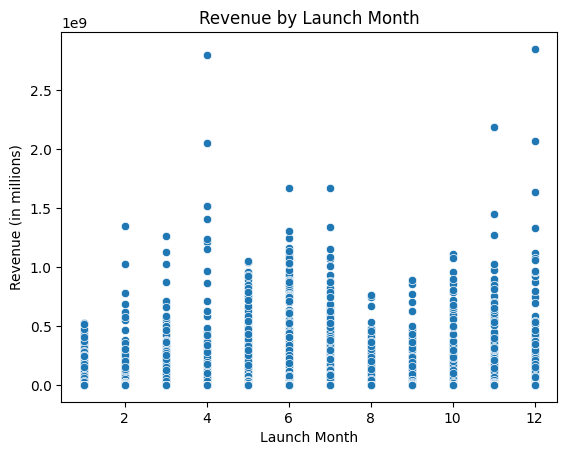

In [7]:


sns.scatterplot(x='releaseMonth', y='revenue', data=df)

plt.title("Revenue by Launch Month")
plt.xlabel("Launch Month")
plt.ylabel("Revenue (in millions)")

# Show the plot
plt.show()

Como se puede observar con el coeficiente de pearson y valor P, ninguno de los dos muestra que exista una correlación entre el mes y el ingreso de cada pelicula estrenada ese mes. Sin embargo, esto se hizo con un test de regresión lineal y esta data no se adapta a un test lineal. Por lo tanto, cuando se pasan a un test más apropiado no lineal como es Kendall Tau y Spearman, los cuales revisan una regresión no lineal, también se puede observar que no tienen ninguna correlación. Sin embargo, la data se adaptaría más para un test por estaciones como lo sería el seasonal kendall tau. Sin embargo, para realizar esto se necesita que en nuestra columna de revenue no existan celdas con ceros, lo cual nuestro dataset si contiene. Por eso mismo, con los tests anteriormente hechos, se determina que no hay ninguna correlación entre mes e ingreso de la película. 

#4.13. (8 puntos) ¿En qué meses se han visto los lanzamientos con mejores ingresos?¿cuantas películas, en promedio, se han lanzado por mes?


¿En qué meses se han visto los lanzamientos con mejores ingresos?


In [8]:
df['releaseMonth'] = pd.to_datetime(df['releaseDate'],format='%m').dt.strftime('%b')


month_revenue_average = df.groupby('releaseMonth')['revenue'].mean().sort_values(ascending=False).head(5)
print(month_revenue_average)




releaseMonth
Jun    9.474711e+07
May    8.784544e+07
Jul    7.602870e+07
Dec    7.435888e+07
Nov    7.149211e+07
Name: revenue, dtype: float64


¿cuantas películas, en promedio, se han lanzado por mes?

In [9]:
df['year'] = pd.to_datetime(df['releaseDate']).dt.year
df['month'] = pd.to_datetime(df['releaseDate'],format='%m').dt.strftime('%b')

min_year = df['year'].min()
max_year = df['year'].max()
delta_year = max_year-min_year
print(delta_year)

month_count = df.groupby('month')['month'].count().sort_values(ascending=False)
month_count = month_count/delta_year
print(month_count)


120
month
Sep    8.991667
Oct    8.900000
Dec    7.791667
Aug    7.608333
Jun    6.825000
Mar    6.791667
Jul    6.766667
Nov    6.725000
Feb    5.883333
May    5.816667
Apr    5.800000
Jan    5.433333
Name: month, dtype: float64


4.14. (7 puntos) ¿Cómo se correlacionan las calificaciones con el éxito comercial?


In [47]:
correlation = df['voteAvg'].corr(df['revenue'])

print("El coeficiente de correlación Pearson entre voteAvg y revenue es:", correlation)


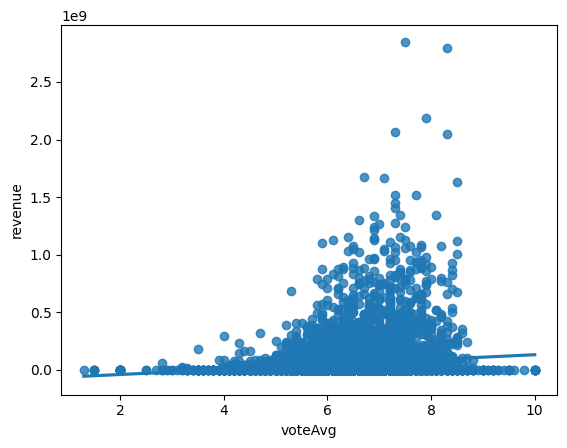

In [15]:
sns.regplot(x='voteAvg', y='revenue', data=df)

# Show the plot
plt.show()

Como se puede observar con tanto el coeficiente de correlación como con la gráfica de dispersión, no existe una correlación entre estas dos variables. 

4.15. (5 puntos) ¿A qué género principal pertenecen las películas más largas?

In [51]:
genre_avg_runtime = df.groupby("genres").mean()["runtime"].sort_values(ascending=False)
print(genre_avg_runtime)

genres
History            122.714286
War                120.637500
Western            116.655738
Drama              111.599556
Crime              111.468085
Adventure          107.527675
Music              104.653061
Action             104.613307
Science Fiction    103.009836
Romance            102.342679
Thriller           101.811935
Mystery            101.125000
Fantasy            100.618257
Comedy              97.800527
Horror              93.180910
Documentary         88.239382
Family              84.751337
TV Movie            80.500000
Animation           76.832306
Name: runtime, dtype: float64


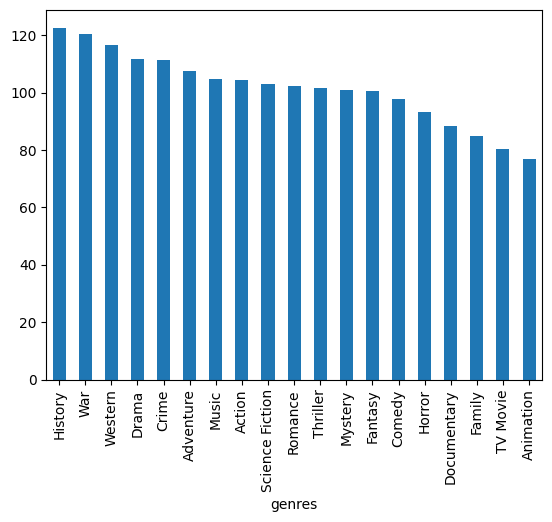

In [46]:
genre_avg_runtime.plot(kind="bar")
plt.show()